In [22]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

In [2]:
file_name_full = "Data/[2]automotive.csv.zip"

colomn_dtype = {
    "firstSeen": object,
    "brandName": object,
    "modelName": object,
    "askPrice": pd.Int64Dtype(),
    "isNew": "bool",
    "vf_Wheels": pd.Int64Dtype(),
    "vf_Seats": pd.Int64Dtype(),
    "vf_Windows": pd.Int64Dtype(),
    "vf_WheelSizeRear": pd.Int64Dtype(),
    "vf_WheelBaseShort": "float64"
}

total_size = 0
index = 0 
has_header = True
for part in pd.read_csv(file_name_full, 
                           usecols=lambda x: x in colomn_dtype.keys(),
                           dtype=colomn_dtype,
                           chunksize=500_000, 
                           compression='zip',
                           na_values=['NA']):
    print(f"index: {index}, cum_size = {total_size}")
    index = index + 1
    total_size = total_size + part.memory_usage(deep=True).sum()
    print(part.shape)
    part.dropna().to_csv("df_2.csv", mode='a', header=has_header)
    has_header = False
    print(part.shape)
    
print(total_size)

index: 0, cum_size = 0
(500000, 10)
(500000, 10)
index: 1, cum_size = 123805762
(500000, 10)
(500000, 10)
index: 2, cum_size = 247297775
(500000, 10)
(500000, 10)
index: 3, cum_size = 370966117
(500000, 10)
(500000, 10)
index: 4, cum_size = 494672684
(500000, 10)
(500000, 10)
index: 5, cum_size = 618453042
(500000, 10)
(500000, 10)
index: 6, cum_size = 742216581
(500000, 10)
(500000, 10)
index: 7, cum_size = 866116921
(500000, 10)
(500000, 10)
index: 8, cum_size = 990300237
(500000, 10)
(500000, 10)
index: 9, cum_size = 1114144735
(500000, 10)
(500000, 10)
index: 10, cum_size = 1237906911
(500000, 10)
(500000, 10)
index: 11, cum_size = 1361643510
(195015, 10)
(195015, 10)
1409797587


In [3]:
pd.set_option("display.max_rows", 20, "display.max_columns", 60)

In [4]:
def read_file(file_name):
    return pd.read_csv(file_name)
    # для заархивированных файлов
    #return next(pd.read_csv(file_name, chunksize=100_000, compression='gzip'))

In [5]:
file_name = "df_2.csv"
read_file(file_name)

,number,firstSeen,askPrice,isNew,brandName,modelName,vf_Seats,vf_WheelBaseShort,vf_WheelSizeRear,vf_Wheels,vf_Windows
0,3,2019-05-06,12387,False,CHEVROLET,Cruze,5,106.3,17,4,4
1,20,2019-05-07,16671,False,CHEVROLET,Impala,5,111.7,18,4,4
2,43,2019-05-07,12959,False,CHEVROLET,Cruze,5,106.3,16,4,4
3,109,2019-05-11,15900,False,CHEVROLET,Impala,5,111.7,18,4,4
4,118,2019-05-13,12998,False,CHEVROLET,Sonic,5,99.4,15,4,4
...,...,...,...,...,...,...,...,...,...,...,...
128337,5694424,2020-03-15,14750,False,CHEVROLET,Malibu,5,111.4,17,4,4
128338,5694496,2020-02-13,18250,False,CHEVROLET,Impala,5,111.7,18,4,4
128339,5694839,2020-05-20,13386,False,CHEVROLET,Malibu,5,111.4,16,4,4
128340,5694980,2020-05-19,13892,False,CHEVROLET,Malibu,5,111.4,16,4,4


In [6]:
def get_memory_stat_by_column(df, output_file):
    # вывод пар: колонка - тип данных
    memory_usage_stat = df.memory_usage(deep=True)
    # суммарный размер
    total_memory_usage = memory_usage_stat.sum()
    result = {
        "file_in_memory_size": f"{int(total_memory_usage // 1024):10} KB",
        "columns": []
    }
    # проходимся по колонкам, записываем в список
    for key in df.dtypes.keys():
        result["columns"].append({
            "column_name": key,
            "memory_abs": int(memory_usage_stat[key] // 1024),
            "memory_per": round(memory_usage_stat[key] / total_memory_usage * 100, 4),
            "dtype": str(df.dtypes[key])
        })
    # отсортируем колонки
    result["columns"].sort(key=lambda x: x['memory_abs'], reverse=True)
    # Запись в файл JSON
    with open(output_file, 'w') as file:
        json.dump(result, file)

In [7]:
file_name = "df_2.csv"
dataset = read_file(file_name)
output_file = "результаты_2.json"
get_memory_stat_by_column(dataset, output_file)

In [8]:
dataset.dtypes

number                 int64
firstSeen             object
askPrice               int64
isNew                   bool
brandName             object
modelName             object
vf_Seats               int64
vf_WheelBaseShort    float64
vf_WheelSizeRear       int64
vf_Wheels              int64
vf_Windows             int64
dtype: object

In [9]:
# Считает объем памяти до и после преобразований
def mem_usage(pandas_obj):
    if isinstance(pandas_obj, pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # предположим, что если это не дадафрейм, то серия
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # преобразуем быйты в мегабайты
    return "{:03.2f} MB".format(usage_mb)

In [10]:
# 4. Преобразовать все колонки с типом данных «object» в категориальные, 
#    если количество уникальных значений колонки составляет менее 50%.

In [11]:
def opt_obj(df):
    converted_obj = pd.DataFrame()
    dataset_obj = df.select_dtypes(include=['object']).copy()
    for col in dataset_obj.columns:
        num_unique_values = len(dataset_obj[col].unique())
        num_total_values = len(dataset_obj[col])
        if num_unique_values / num_total_values < 0.5:
            converted_obj.loc[:, col] = dataset_obj[col].astype('category')
        else:
            converted_obj.loc[:, col] = dataset_obj[col]
    print(mem_usage(dataset_obj))
    print(mem_usage(converted_obj))
    return converted_obj    

In [12]:
converted_obj = opt_obj(dataset)

23.87 MB
0.61 MB


In [13]:
# 5.Провести понижающее преобразование для столбцов типов «int» колонок
def opt_int(df):
    dataset_int = df.select_dtypes(include=['int']) # выбираем колонки типа int
    """
    downcast:
            - 'integer' or 'signed': smallest signed int dtype (min.: np.int8)
            - 'unsigned': smallest unsigned int dtype (min.: np.int8)
            - 'float': smallest float dtype (min.: np.float32)
    """
    converted_int = dataset_int.apply(pd.to_numeric, downcast='unsigned')
    print(mem_usage(dataset_int))
    print(mem_usage(converted_int))
    compare_ints = pd.concat([dataset_int.dtypes, converted_int.dtypes], axis=1)
    compare_ints.columns = ['before', 'after']
    compare_ints.apply(pd.Series.value_counts)
    print(compare_ints)
    return converted_int

In [14]:
converted_int = opt_int(dataset)

5.88 MB
1.47 MB
                 before   after
number            int64  uint32
askPrice          int64  uint32
vf_Seats          int64   uint8
vf_WheelSizeRear  int64   uint8
vf_Wheels         int64   uint8
vf_Windows        int64   uint8


In [15]:
# 6. Провести понижающее преобразование для столбцов типов «float» колонок
def opt_float(df):
    dataset_float = df.select_dtypes(include=['float'])
    converted_float = dataset_float.apply(pd.to_numeric, downcast='float')
    print(mem_usage(dataset_float))
    print(mem_usage(converted_float))
    compare_float = pd.concat([dataset_float.dtypes, converted_float.dtypes], axis=1)
    compare_float.columns = ['before', 'after']
    compare_float.apply(pd.Series.value_counts)
    print(compare_float)
    return converted_float

In [16]:
converted_float = opt_float(dataset)

0.98 MB
0.49 MB
                    before    after
vf_WheelBaseShort  float64  float32


In [17]:
# 7. Повторно провести анализ набора данных, как в п. 2, сравнив показатели занимаемой памяти
# Создаем копию исходного датафрейма
optimized_dataset = dataset.copy()

# заменяем исходные числовые столбцы оптмизированными
optimized_dataset[converted_obj.columns] = converted_obj
optimized_dataset[converted_int.columns] = converted_int
optimized_dataset[converted_float.columns] = converted_float

print(mem_usage(dataset))
print(mem_usage(optimized_dataset))

30.85 MB
2.69 MB


In [18]:
# 8. Выбрать произвольно 10 колонок для дальнейшем работы, 
#    прописав преобразование типов и загрузку только нужных данных на этапе чтения файла. 
#    При этом стоит использовать чанки. Сохраните полученный поднабор в отдельном файле.

In [19]:
need_column = dict()
#column_names = ['date', 'number_of_game', 'day_of_week',
#           'park_id', 'v_manager_name', 'length_minutes',
#           'v_hits', 'h_hits', 'h_walks', 'h_errors']

opt_dtypes = optimized_dataset.dtypes

for key in dataset.columns:
    need_column[key] = opt_dtypes[key]
    print(f"{key}:{opt_dtypes[key]}")

with open("dtypes_2.json", mode="w") as file:
    dtype_json = need_column.copy()
    for key in dtype_json.keys():
        dtype_json[key] = str(dtype_json[key])
    json.dump(dtype_json, file)
    
# Работа с чанкам
#has_header = True
#for chunk in pd.read_csv(file_name,
#                         usecols=lambda x: x in column_names,
#                         dtype=need_column,
#                         #parse_dates=['date'],
#                         #infer_datetime_format=True,
#                         chunksize=100_000):
    # любые преобразования
#    print(mem_usage(chunk))
#    chunk.to_csv('df_1.csv', mode='a', header=has_header)
#    has_header = False

number:uint32
firstSeen:category
askPrice:uint32
isNew:bool
brandName:category
modelName:category
vf_Seats:uint8
vf_WheelBaseShort:float32
vf_WheelSizeRear:uint8
vf_Wheels:uint8
vf_Windows:uint8


In [20]:
# сохраняем информацию о типах, коорые нам нужны. Необходимо для графиков.
def read_types(file_name):
    dtypes = {}
    with open(file_name, mode='r') as file:
        dtypes = json.load(file)
    for key in dtypes.keys():
        if dtypes[key] == 'category':
            dtypes[key] = pd.CategoricalDtype
        elif dtypes[key] == 'string':
            dtypes[key] = pd.StringDtype
        else:    
            dtypes[key] = np.dtype(dtypes[key])
    return dtypes

need_dtypes = read_types("dtypes_2.json")

dataset = pd.read_csv("df_2.csv",
                  usecols=lambda x: x in need_dtypes.keys(),
                  dtype=need_column)
dataset.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128342 entries, 0 to 128341
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   number             128342 non-null  uint32  
 1   firstSeen          128342 non-null  category
 2   askPrice           128342 non-null  uint32  
 3   isNew              128342 non-null  bool    
 4   brandName          128342 non-null  category
 5   modelName          128342 non-null  category
 6   vf_Seats           128342 non-null  uint8   
 7   vf_WheelBaseShort  128342 non-null  float32 
 8   vf_WheelSizeRear   128342 non-null  uint8   
 9   vf_Wheels          128342 non-null  uint8   
 10  vf_Windows         128342 non-null  uint8   
dtypes: bool(1), category(3), float32(1), uint32(2), uint8(4)
memory usage: 2.7 MB


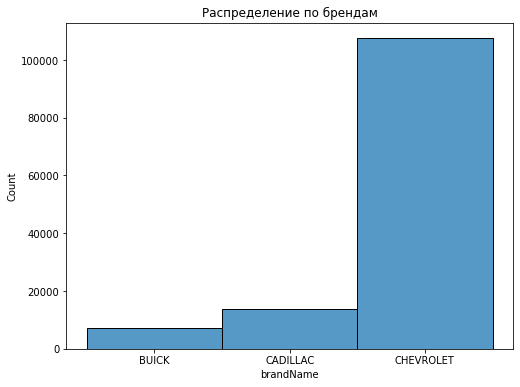

In [23]:
# Гистограмма 
plt.figure(figsize=(8, 6))
sns.histplot(dataset['brandName'], bins=20)
plt.title('Распределение по брендам')
plt.show()

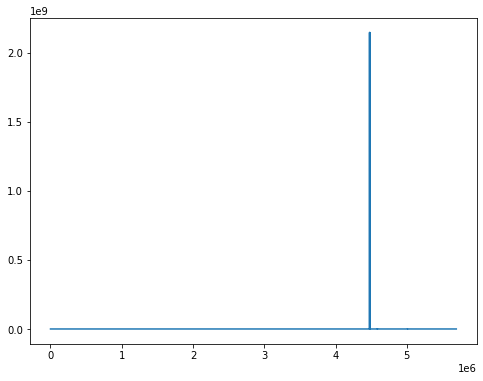

In [29]:
# Линейный график
plt.figure(figsize=(8, 6))
sns.lineplot(x='number', y='askPrice', data=dataset)
plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.show()

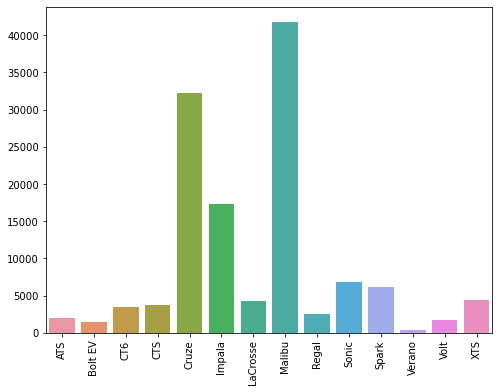

In [31]:
# Столбчатый график 
plt.figure(figsize=(8, 6))
sns.countplot(x='modelName', data=dataset)
plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.xticks(rotation=90)
plt.show()

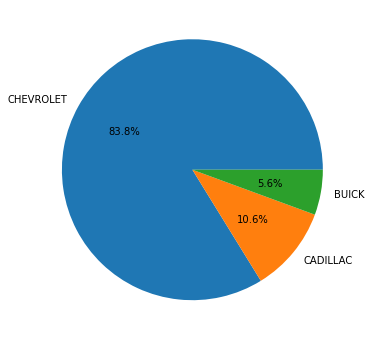

In [33]:
# Круговая диаграмма
plt.figure(figsize=(8, 6))
park_counts = dataset['brandName'].value_counts()
plt.pie(park_counts, labels=park_counts.index, autopct='%1.1f%%')
plt.title('')
plt.show()

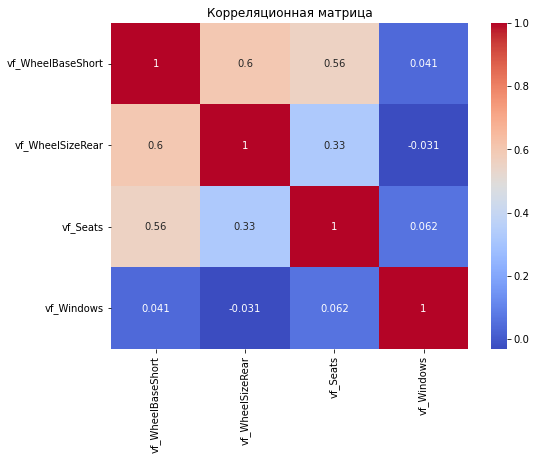

In [35]:
# Корреляционная матрица для связи различных числовых переменных
numerical_vars = ['vf_WheelBaseShort', 'vf_WheelSizeRear', 'vf_Seats', 'vf_Windows']
correlation_matrix = dataset[numerical_vars].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()